In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Data
data = pd.read_excel("Data Set.xlsx")

In [3]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
#Data understanding 

#Watching all records as well as columns in the data set
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1,-1,1,4,4,0,0,0,0,0,0,1,1,24,4,1,1,0,6

In [5]:
credit_report = pandas_profiling.ProfileReport(data)
credit_report.to_file('credit_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### columns to Remove

In [6]:
data.drop(["custid","lncardmon","lncardten","lnequipmon",
           "lnequipten","lntollmon","lntollten","lnwiremon",
           "lnwireten","address","age","cardtenure","card2tenure",
           "tenure","cardtenurecat","commute","ed","lninc","lnlongten",
           "longten","marital","spoused"], axis=1, inplace=True)

In [7]:
data.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,income,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,card2tenurecat,cardspent,card2spent,active,bfast,churn,longmon,lnlongmon,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,0,31,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,-1,3,0,0,0,0,0,0,0,0,0,2,1,2,1,0,14.3,1,0,0,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,5,3,1,0,2,81.66,67.80,0,3,1,6.50,1.871802,1,29.0,161.05,1,29.50,126.1,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,0,15,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,-1,2,6,0,0,0,0,0,0,6,1,3,1,2,1,1,6.8,1,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,1,3,0,2,42.60,34.94,1,1,0,8.90,2.186051,0,0.0,0.00,1,54.85,1975.0,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,0,35,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,2,3,3,2,1,0,0,0,0,0,1,1,5,3,1,1,18.8,1,0,1,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,4,1,3,0,5,184.22,175.75,0,3,0,28.40,3.346389,0,0.0,0.00,0,0.00,0.0,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,0,20,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,4,5,0,0,0,0,0,0,0,0,1,3,2,3,1,1,8.7,1,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,3,2,4,0,2,340.99,18.42,1,1,0,6.00,1.791759,0,0.0,0.00,0,0.00,0.0,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,0,23,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,2,4,0,0,0,0,0,0,0,0,0,2,2,1,0,1,10.6,1,0,1,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,1,3,2,0,3,255.10,252.73,1,3,0,3.05,1.115142,1,16.5,387.70,0,0.00,0.0,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [8]:
data.shape

(5000, 108)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 108 entries, region to response_03
dtypes: float64(20), int64(87), object(1)
memory usage: 4.1+ MB


### Columns separation

In [10]:
credit_report=pandas_profiling.ProfileReport(data)
credit_report.to_file('credit_report1.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data.drop("equipmon", axis=1, inplace=True)

In [12]:
data.cardspent

0        81.66
1        42.60
2       184.22
3       340.99
4       255.10
         ...  
4995    872.11
4996    210.81
4997    884.08
4998    381.35
4999    269.72
Name: cardspent, Length: 5000, dtype: float64

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(5000, 107)

In [15]:
to_convert=[
"card2tenurecat",
"cars",
"commutecat", 
"edcat",
"empcat", 
"inccat",
"internet", 
"jobcat", 
"jobsat", 
"pets_birds", 
"pets_dogs", 
"pets_cats", 
"pets_freshfish", 
"pets_reptiles", 
"pets_saltfish",
"pets_small",
"polview",
"reason",
"region",
"reside",
"spousedcat",
"townsize"]

In [16]:
cat_var=["active",
"bfast",
"birthmonth",
"callcard",
"callid",
"callwait",
"carbought",
"carbuy",
"carcatvalue",
"card",
"card2",
"card2benefit",
"card2fee",
"card2tenurecat",
"card2type",
"cardbenefit",
"cardfee",
"cardtype",
"carown",
"cars",
"cartype",
"churn",
"commutebike",
"commutebus",
"commutecar",
"commutecarpool",
"commutecat",
"commutemotorcycle",
"commutenonmotor",
"commutepublic",
"commuterail",
"commutewalk",
"confer",
"default",
"ebill",
"edcat",
"empcat",
"forward",
"gender",
"homeown",
"hometype",
"inccat",
"internet",
"jobcat",
"jobsat",
"multline",
"news",
"owncd",
"owndvd",
"ownfax",
"owngame",
"ownipod",
"ownpc",
"ownpda",
"owntv",
"ownvcr",
"pager",
"pets_birds",
"pets_dogs",
"pets_cats",
"pets_freshfish",
"pets_reptiles",
"pets_saltfish",
"pets_small",
"polcontrib",
"polparty",
"polview",
"reason",
"region",
"reside",
"response_01", 
"response_02",
"response_03",
"retire",
"spousedcat",
"telecommute",
"tollfree",
"townsize",
"union",
"voice",
"vote",
"addresscat",
"agecat", 
"wireless",
"equip"]

In [17]:
data_cat=data[cat_var]

In [18]:
data_cat

,active,bfast,birthmonth,callcard,callid,callwait,carbought,carbuy,carcatvalue,card,card2,card2benefit,card2fee,card2tenurecat,card2type,cardbenefit,cardfee,cardtype,carown,cars,cartype,churn,commutebike,commutebus,commutecar,commutecarpool,commutecat,commutemotorcycle,commutenonmotor,commutepublic,commuterail,commutewalk,confer,default,ebill,edcat,empcat,forward,gender,homeown,hometype,inccat,internet,jobcat,jobsat,multline,news,owncd,owndvd,ownfax,owngame,ownipod,ownpc,ownpda,owntv,ownvcr,pager,pets_birds,pets_dogs,pets_cats,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,polcontrib,polparty,polview,reason,region,reside,response_01,response_02,response_03,retire,spousedcat,telecommute,tollfree,townsize,union,voice,vote,addresscat,agecat,wireless,equip
0,0,3,September,1,0,1,0,0,1,3,5,1,0,2,3,1,0,1,1,2,0,1,0,0,0,1,4,1,0,0,0,1,1,1,0,3,1,1,1,0,2,2,0,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,6,9,1,3,0,1,0,0,-1,0,1,2.0,1,1,1,1,2,0,1
1,1,1,May,1,1,0,0,0,1,2,4,3,0,2,1,1,0,4,1,2,1,0,1,1,1,0,1,0,1,0,0,0,0,1,1,4,1,1,0,1,3,1,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,6,0,0,0,0,1,4,9,5,2,0,0,0,0,-1,1,0,5.0,0,1,0,1,2,1,1
2,0,3,June,1,0,0,0,1,1,2,4,3,0,5,1,4,0,1,1,3,1,0,0,1,1,1,3,0,0,0,1,0,0,0,0,2,5,0,1,1,1,2,0,2,4,1,1,1,1,0,0,0,0,0,1,1,0,0,1,2,0,0,0,0,0,1,5,2,3,3,0,0,0,0,2,0,0,4.0,0,0,0,5,6,0,0
3,1,1,May,1,0,0,0,1,1,2,3,4,0,2,2,4,0,1,1,3,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,3,1,0,0,1,3,1,2,2,2,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,3,9,4,5,1,0,0,0,4,0,0,3.0,0,0,0,2,2,0,0
4,1,3,July,1,1,1,0,1,1,4,1,2,0,3,3,1,0,2,0,1,1,0,0,0,0,0,3,0,0,1,0,1,1,0,0,3,1,1,0,0,2,1,3,2,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,4,9,2,4,0,1,0,0,2,0,1,2.0,0,1,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,2,January,1,0,0,0,0,3,1,3,4,0,5,3,3,0,3,1,1,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,5,0,0,1,1,5,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,4,0,0,0,0,1,0,4,9,2,1,0,0,0,0,-1,0,0,2.0,0,0,1,4,6,0,0
4996,1,1,May,1,1,1,1,1,3,3,5,2,0,4,1,4,0,4,1,2,1,0,0,1,1,0,3,0,0,1,0,0,1,1,0,2,3,1,0,1,1,4,0,1,5,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,4,9,3,1,0,0,0,0,-1,0,1,3.0,0,0,0,3,5,1,0
4997,0,3,August,1,1,1,1,0,3,1,2,4,0,5,4,1,0,3,1,3,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,4,5,1,0,1,3,4,0,1,3,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,4,9,4,1,0,0,0,0,-1,0,1,5.0,0,0,0,5,6,0,0
4998,0,3,December,1,0,0,1,1,3,3,4,1,0,4,3,1,0,1,1,2,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,4,2,0,0,1,1,5,3,2,4,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,2,9,1,4,0,0,0,0,3,0,0,1.0,0,0,0,4,4,0,1


In [19]:
data_num=data[data.columns.difference(cat_var)]

In [20]:
data_cat[to_convert]=data_cat[to_convert].astype(object)

In [21]:
data_cat[to_convert].dtypes

card2tenurecat    object
cars              object
commutecat        object
edcat             object
empcat            object
inccat            object
internet          object
jobcat            object
jobsat            object
pets_birds        object
pets_dogs         object
pets_cats         object
pets_freshfish    object
pets_reptiles     object
pets_saltfish     object
pets_small        object
polview           object
reason            object
region            object
reside            object
spousedcat        object
townsize          object
dtype: object

In [22]:
data_cat=data_cat.astype(object)

In [24]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
data_num=data_num.apply(outlier_capping)

In [25]:
data_num=data_num.fillna(np.median)

In [26]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   active             5000 non-null   object
 1   bfast              5000 non-null   object
 2   birthmonth         5000 non-null   object
 3   callcard           5000 non-null   object
 4   callid             5000 non-null   object
 5   callwait           5000 non-null   object
 6   carbought          5000 non-null   object
 7   carbuy             5000 non-null   object
 8   carcatvalue        5000 non-null   object
 9   card               5000 non-null   object
 10  card2              5000 non-null   object
 11  card2benefit       5000 non-null   object
 12  card2fee           5000 non-null   object
 13  card2tenurecat     5000 non-null   object
 14  card2type          5000 non-null   object
 15  cardbenefit        5000 non-null   object
 16  cardfee            5000 non-null   object


In [27]:
data_cat.townsize.fillna(data_cat.townsize.mode(), inplace=True)

In [28]:
data_cat.townsize.unique()

array([ 2.,  5.,  4.,  3.,  1., nan])

In [29]:
data_cat[~data_cat.townsize.isin([1,2,3,4,5])].townsize

961    NaN
2731   NaN
Name: townsize, dtype: float64

In [30]:
data_cat.townsize.mode()

0    1.0
dtype: float64

In [31]:
data_cat.townsize.iloc[961]=1
data_cat.townsize.iloc[2731]=1

In [32]:
data_cat.townsize=data_cat.townsize.astype(object)

In [33]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   active             5000 non-null   object
 1   bfast              5000 non-null   object
 2   birthmonth         5000 non-null   object
 3   callcard           5000 non-null   object
 4   callid             5000 non-null   object
 5   callwait           5000 non-null   object
 6   carbought          5000 non-null   object
 7   carbuy             5000 non-null   object
 8   carcatvalue        5000 non-null   object
 9   card               5000 non-null   object
 10  card2              5000 non-null   object
 11  card2benefit       5000 non-null   object
 12  card2fee           5000 non-null   object
 13  card2tenurecat     5000 non-null   object
 14  card2type          5000 non-null   object
 15  cardbenefit        5000 non-null   object
 16  cardfee            5000 non-null   object


In [34]:
data_cat=pd.get_dummies(data_cat, drop_first=True)

In [35]:
data_final=pd.concat([data_num,data_cat],axis=1)

In [36]:
data_final.lncreddebt

0       0.183079
1       0.200505
2      -0.074056
3      -3.401644
4      -1.538705
          ...   
4995    2.071167
4996    1.204952
4997    1.269064
4998    1.613699
4999    0.818744
Name: lncreddebt, Length: 5000, dtype: float64

In [37]:
#Calculate CV for all the variables

cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x) )

In [38]:
cv_vars.to_csv('cv.csv')

#### Vars to delete bases on CV

In [39]:
to_delete=[
"lncreddebt",
"cars_8",
"pets_reptiles_5",
"pets_dogs_7",
"pets_birds_5",
"pets_saltfish_8",
"pets_freshfish_16",
"pets_reptiles_6",
"pets_reptiles_4",
"pets_small_7",
"pets_cats_6",
"reside_9",
"pets_saltfish_7",
"pets_saltfish_1",
"pets_small_6",
"pets_freshfish_13",
"pets_dogs_5",
"pets_freshfish_14",
"pets_cats_5",
"pets_freshfish_15",
"reside_8",
"pets_saltfish_5",
"pets_saltfish_4",
"pets_small_5",
"pets_saltfish_6",
"pets_saltfish_2",
"pets_saltfish_3",
"cars_7"]

In [40]:
#dropping the variables with low variation (CV<0.05)

data_final.drop(to_delete, axis=1, inplace=True)

In [41]:
data_final.shape

(5000, 221)

#### Checking of normalization


<AxesSubplot:>

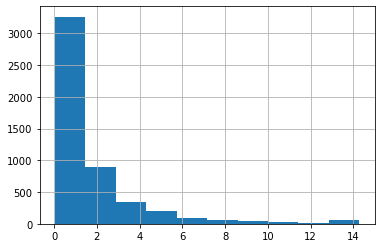

In [42]:
# Checking the Distribution of Credit_Amount
# Target variable following Exponential distribution.

data_final.creddebt.hist()

In [43]:
#Applying transformation for target variable to make it into Near normal

data_final['In_creddebt'] = np.log(data_final.creddebt)

<AxesSubplot:>

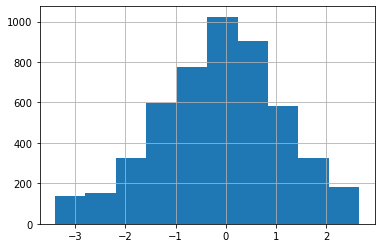

In [44]:
data_final.In_creddebt.hist()

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

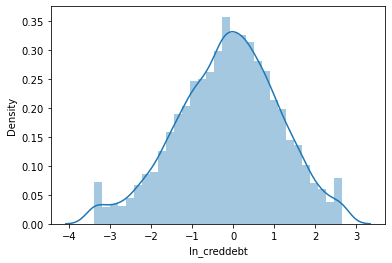

In [45]:
sns.distplot(data_final.In_creddebt)

In [46]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 222 entries, card2spent to In_creddebt
dtypes: float64(22), uint8(200)
memory usage: 1.8 MB


#### Variable Reduction

In [47]:
#using Linearity assumption (Y & X should have linear relationship)

corr_mat = data_final.corr()
corr_mat.to_csv('corr_mat.csv')

In [48]:
corr_list=[
"spousedcat_5",
"response_03_1",
"jobsat_2",
"empcat_2",
"news_1",
"callid_1",
"tollfree_1",
"agecat_3",
"agecat_6",
"edcat_5",
"card_5",
"cardmon",
"ownfax_1",
"card2_5",
"vote_1",
"hometype_2",
"confer_1",
"forward_1",
"inccat_2",
"pager_1",
"card_2",
"callwait_1",
"edcat_4",
"longmon",
"cardten",
"card2tenurecat_2",
"homeown_1",
"callcard_1",
"card_4",
"wireless_1",
"voice_1",
"empcat_4",
"ownpda_1",
"addresscat_2",
"agecat_4",
"lnlongmon",
"multline_1",
"equipten",
"tollmon",
"card2tenurecat_5",
"wiremon",
"owntv_1",
"jobcat_2",
"empcat_5",
"jobsat_5",
"tollten",
"addresscat_4",
"wireten",
"inccat_3",
"carcatvalue_2",
"carown_1",
"employ",
"agecat_5",
"default_1",
"owncd_1",
"ownvcr_1",
"carown_0",
"owndvd_1",
"card2spent",
"retire_1",
"cardspent",
"inccat_4",
"inccat_5",
"carcatvalue_3",
"carcatvalue_1",
"carvalue",
"income",
"debtinc",
"othdebt",
"lnothdebt"]

In [49]:
#Selecting features

features = data_final[data_final.columns.difference(['In_creddebt','creddebt'])]
target = data_final['In_creddebt']

#### RFE

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#create the RFE model and select 50 attributes

rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(features, target)

In [51]:
#Alternative of capturing the important variables

RFE_features=features.columns[rfe.get_support()]
features1 = features[RFE_features]

In [52]:
RFE_features

Index(['agecat_4', 'agecat_5', 'agecat_6', 'carbought_0', 'carbought_1', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card_5', 'carown_0', 'carown_1', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'cartype_0', 'cartype_1', 'commutenonmotor_1', 'debtinc', 'default_1', 'empcat_4', 'empcat_5', 'inccat_2', 'inccat_3', 'inccat_4', 'inccat_5', 'othdebt', 'owncd_1', 'owntv_1', 'ownvcr_1', 'pets_birds_2', 'pets_birds_3', 'pets_birds_4', 'pets_cats_4', 'pets_dogs_4', 'pets_freshfish_1', 'pets_freshfish_10', 'pets_freshfish_4', 'pets_freshfish_7', 'pets_freshfish_8', 'pets_reptiles_2', 'pets_small_2', 'pets_small_3', 'pets_small_4', 'polview_7', 'reason_3', 'retire_1', 'spousedcat_5'], dtype='object')

In [53]:
RFE_features_list=['agecat_4', 'agecat_5', 'agecat_6', 'birthmonth_January', 'carcatvalue_1', 'carcatvalue_2',
                   'carcatvalue_3', 'card_5', 'carown_1', 'cars_1', 'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6',
                   'commutemotorcycle_1', 'commutenonmotor_1', 'debtinc', 'default_1', 'empcat_4', 'empcat_5', 'inccat_2',
                   'inccat_3', 'inccat_4', 'inccat_5', 'othdebt', 'owncd_1', 'owntv_1', 'ownvcr_1', 'pets_birds_2',
                   'pets_birds_3', 'pets_birds_4', 'pets_cats_4', 'pets_dogs_4', 'pets_freshfish_1', 'pets_freshfish_10',
                   'pets_freshfish_4', 'pets_freshfish_7', 'pets_freshfish_8', 'pets_reptiles_2', 'pets_reptiles_3',
                   'pets_small_2', 'pets_small_3', 'pets_small_4', 'polview_5', 'polview_7', 'reason_2', 'reason_3',
                   'retire_1', 'spousedcat_5']

#### F - Regression

In [54]:
# Feature Selection based on importance

from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features1, target)

In [55]:
import itertools

f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features1.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [56]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(50)

In [57]:
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)

In [58]:
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]

In [59]:
f_reg_results

,Variable,F_Value,P_Value
0,agecat_4,45.792620,0.000
31,ownvcr_1,209.699624,0.000
30,owntv_1,71.761742,0.000
29,owncd_1,193.935524,0.000
28,othdebt,2238.730316,0.000
27,inccat_5,627.613726,0.000
26,inccat_4,327.179802,0.000
25,inccat_3,107.489953,0.000
48,retire_1,266.862616,0.000
23,empcat_5,79.889513,0.000


In [60]:
f_reg_list=f_reg_results.Variable.values

In [61]:
f_reg_list

array(['agecat_4', 'ownvcr_1', 'owntv_1', 'owncd_1', 'othdebt',
       'inccat_5', 'inccat_4', 'inccat_3', 'retire_1', 'empcat_5',
       'empcat_4', 'default_1', 'debtinc', 'inccat_2', 'agecat_5',
       'agecat_6', 'carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3',
       'card_5', 'carown_0', 'carown_1', 'spousedcat_5', 'cartype_0',
       'cartype_1', 'polview_7', 'pets_cats_4', 'carbought_0',
       'carbought_1', 'pets_freshfish_8', 'cars_4', 'cars_1',
       'pets_freshfish_7'], dtype=object)

In [62]:
f_reg_list=['agecat_4', 'ownvcr_1', 'owntv_1', 'owncd_1', 'othdebt',
       'retire_1', 'inccat_4', 'inccat_3', 'inccat_2', 'empcat_5',
       'empcat_4', 'default_1', 'debtinc', 'inccat_5', 'spousedcat_5',
       'carown_1', 'card_5', 'carcatvalue_3', 'carcatvalue_2',
       'carcatvalue_1', 'agecat_5', 'agecat_6', 'polview_7',
       'pets_cats_4', 'pets_freshfish_8', 'cars_4', 'cars_1',
       'pets_freshfish_7']

In [63]:
final_vars=corr_list+RFE_features_list+f_reg_list

In [64]:
final_var_list=list(set(final_vars))

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
final_list=['debtinc',
 #'card2tenurecat_2',
 #'pets_freshfish_8',
 #'multline_1',
 #'pets_birds_4',
 #'cars_6',
 #'agecat_5',
 #'confer_1',
 #'pets_small_2',
 #'reason_3',
 #'tollfree_1',
 #'carcatvalue_1',
 #'pets_birds_2',
 #'cardten',
 'inccat_3',
 #'cars_4',
 #'pets_dogs_4',
 'default_1',
 #'othdebt',
 #'owncd_1',
 'card_5',
 #'card2spent',
 'agecat_4',
 #'pets_small_3',
 'income',
 #'hometype_2',
 #'vote_1',
 #'carcatvalue_3',
 #'tollten',
 #'longmon',
 #'homeown_1',
 #'voice_1',
 #'lnlongmon',
 #'commutenonmotor_1',
 #'carcatvalue_2',
 #'cars_2',
 #'ownfax_1',
 #'pets_cats_4',
 #'empcat_5',
 #'pets_freshfish_7',
 #'card2tenurecat_5',
 #'polview_7',
 #'cars_5',
 #'addresscat_4',
 #'callcard_1',
 #'pets_reptiles_3',
 #'pets_small_4',
 #'edcat_4',
 #'cars_1',
 #'card_4',
 #'card_2',
 'polview_5',
 #'lnothdebt',
 #'birthmonth_January',
 #'addresscat_2',
 #'cardmon',
 #'card2_5',
 #'owntv_1',
 'retire_1',
 #'news_1',
 #'carown_1',
 #'commutemotorcycle_1',
 #'ownvcr_1',
 #'agecat_3',
 #'pets_freshfish_4',
 #'edcat_5',
 #'spousedcat_5',
 #'pets_reptiles_2',
 #'wireless_1',
 #'wireten',
 #'wiremon',
 #'ownpda_1',
 #'owndvd_1',
 #'reason_2',
 #'tollmon',
 #'pager_1',
 #'inccat_2',
 #'agecat_6',
 #'pets_freshfish_1',
 #'callid_1',
 #'jobsat_5',
 'inccat_4',
 #'cars_3',
 #'inccat_5',
 #'carvalue',
 #'response_03_1',
 #'empcat_2',
 #'jobsat_2',
 #'empcat_4',
 #'callwait_1',
 #'pets_birds_3',
 #'forward_1',
 'cardspent',
 #'employ',
 #'carown_0',
 #'pets_freshfish_10',
 #'equipten',
 #'jobcat_2'
]

In [67]:
x_new=features[final_list]

In [68]:
vif=pd.DataFrame()
vif["vif_factor"]=[variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"]=x_new.columns

In [69]:
vif.sort_values(by=["vif_factor"], ascending=False)

,vif_factor,features
9,3.124245,cardspent
0,2.981700,debtinc
5,2.826206,income
2,1.522092,default_1
8,1.387475,inccat_4
4,1.339684,agecat_4
1,1.293334,inccat_3
7,1.253216,retire_1
6,1.187656,polview_5
3,1.044836,card_5


##### final_list

In [70]:
formula='In_creddebt ~ ' + "+".join(final_list)

In [71]:
#Split the data into train & test

train, test = train_test_split(data_final, test_size=0.3, random_state=123)

In [72]:
train.In_creddebt

4036    0.784358
2883    0.707807
4162   -1.434661
4640    0.057651
2430    1.293179
          ...   
1593   -1.025358
4060   -0.651744
1346    1.112278
3454    1.851846
3582   -0.091345
Name: In_creddebt, Length: 3500, dtype: float64

In [73]:
import statsmodels.formula.api as smp

In [74]:
ols_model = smp.ols(formula = formula, data=train).fit()

In [75]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            In_creddebt   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     553.2
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        15:03:51   Log-Likelihood:                -4080.7
No. Observations:                3500   AIC:                             8183.
Df Residuals:                    3489   BIC:                             8251.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9998      0.037    -54.424      0.0

In [76]:
x_train=train[final_list]
y_train=train["In_creddebt"]

In [77]:
x_test=test[final_list]
y_test=test["In_creddebt"]

In [78]:
train_predicted = np.exp(ols_model.predict(train))
test_predicted = np.exp(ols_model.predict(test))

In [79]:
train_actual = np.exp(train.In_creddebt)
test_actual = np.exp(test.In_creddebt)

In [80]:
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)
print(train_MAPE)
print(test_MAPE)

0.8886120622159751
0.8578348734700465


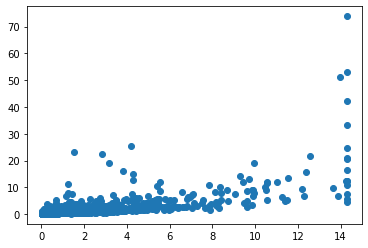

In [81]:
plt.scatter(test_actual,test_predicted)
plt.show()

<AxesSubplot:xlabel='In_creddebt'>

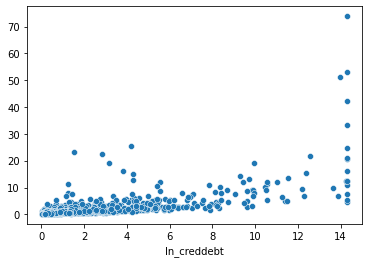

In [82]:
sns.scatterplot(test_actual,test_predicted)

<AxesSubplot:ylabel='Density'>

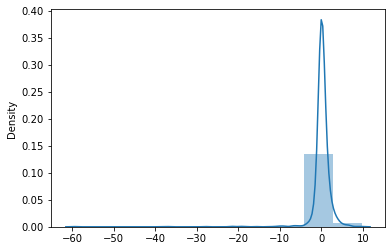

In [83]:
sns.distplot((test_actual-test_predicted),bins=10)

In [84]:
from sklearn import metrics

In [85]:
metrics.explained_variance_score(test_actual,test_predicted)

-0.42538826538650065

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

#### RandomForestRegressor

In [87]:
final_list_rf=['debtinc',
 'card2tenurecat_2',
 #'pets_freshfish_8',
 'multline_1',
 #'pets_birds_4',
 #'cars_6',
 #'agecat_5',
 'confer_1',
 #'pets_small_2',
 #'reason_3',
 'tollfree_1',
 #'carcatvalue_1',
 #'pets_birds_2',
 'cardten',
 'inccat_3',
 #'cars_4',
 #'pets_dogs_4',
 'default_1',
 'othdebt',
 'owncd_1',
 'card_5',
 'card2spent',
 'agecat_4',
 #'pets_small_3',
 'income',
 'hometype_2',
 'vote_1',
 #'carcatvalue_3',
 'tollten',
 'longmon',
 'homeown_1',
 'voice_1',
 'lnlongmon',
 #'commutenonmotor_1',
 #'carcatvalue_2',
 #'cars_2',
 'ownfax_1',
 #'pets_cats_4',
 'empcat_5',
 #'pets_freshfish_7',
 #'card2tenurecat_5',
 #'polview_7',
 #'cars_5',
 'addresscat_4',
 #'callcard_1',
 #'pets_reptiles_3',
 #'pets_small_4',
 #'edcat_4',
 #'cars_1',
 #'card_4',
 #'card_2',
 'polview_5',
 'lnothdebt',
 #'birthmonth_January',
 #'addresscat_2',
 'cardmon',
 #'card2_5',
 'owntv_1',
 'retire_1',
 'news_1',
 'carown_1',
 'commutemotorcycle_1',
 'ownvcr_1',
 'agecat_3',
 #'pets_freshfish_4',
 'edcat_5',
 'spousedcat_5',
 #'pets_reptiles_2',
 'wireless_1',
 'wireten',
 'wiremon',
 'ownpda_1',
 'owndvd_1',
 #'reason_2',
 'tollmon',
 'pager_1',
 #'inccat_2',
 #'agecat_6',
 #'pets_freshfish_1',
 #'callid_1',
 #'jobsat_5',
 'inccat_4',
 #'cars_3',
 #'inccat_5',
 #'carvalue',
 #'response_03_1',
 #'empcat_2',
 'jobsat_2',
 #'empcat_4',
 #'callwait_1',
 #'pets_birds_3',
 'forward_1',
 'cardspent',
 'employ',
 'carown_0',
 #'pets_freshfish_10',
 'equipten',
 #'jobcat_2'
]

In [88]:
x_train_rf=train[final_list_rf]
y_train_rf=train["In_creddebt"]

In [89]:
x_test_rf=test[final_list_rf]
y_test_rf=test["In_creddebt"]

In [90]:
#Grid search

param_grid={'n_estimators':[50,100,120,150],'max_features':[4,5,6], 'max_depth':[3,4,5,6,7,8], 'max_leaf_nodes':[5,6,7,8,9,10]}
model_rf=GridSearchCV(RandomForestRegressor(), param_grid)

In [91]:
rf = RandomForestRegressor(n_estimators=100)

In [92]:
model_rf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [4, 5, 6],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 100, 120, 150]})

In [93]:
rf.fit(x_train_rf, y_train_rf)

RandomForestRegressor()

In [94]:
rf.score(x_test_rf, y_test_rf)

0.865637610299866

In [95]:
rf_pred=rf.predict(x_test_rf)

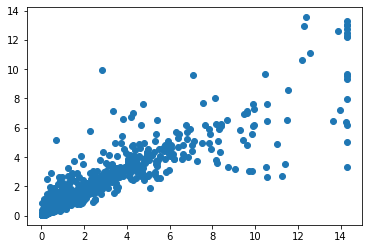

In [96]:
plt.scatter(test_actual,np.exp(rf_pred))
plt.show()

<AxesSubplot:xlabel='In_creddebt'>

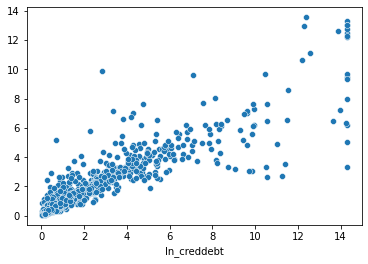

In [97]:
sns.scatterplot(test_actual,np.exp(rf_pred))

### Random forest showing better results!

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

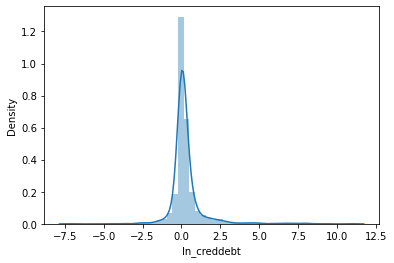

In [98]:
sns.distplot((test_actual-np.exp(rf_pred)),bins=50)

In [99]:
test_actual

2648    0.373730
2456    1.361250
4557    0.090984
4884    0.657536
92      4.133415
          ...   
3014    1.269600
734     0.289892
452     2.216313
2558    0.176946
1927    2.560896
Name: In_creddebt, Length: 1500, dtype: float64

In [100]:
np.exp(rf_pred)

array([0.39792669, 1.26914207, 0.08680842, ..., 1.83492131, 0.11339002,
       2.22234042])

#### XGBoost

In [101]:
xgb=XGBRegressor()

In [102]:
xgb.fit(x_train_rf, y_train_rf)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [103]:
xgb.score(x_test_rf,y_test_rf)

0.8962152064056049

In [104]:
xgb_pred=xgb.predict(x_test_rf)

In [105]:
metrics.explained_variance_score(test_actual,np.exp(xgb_pred))

0.8283284443611729

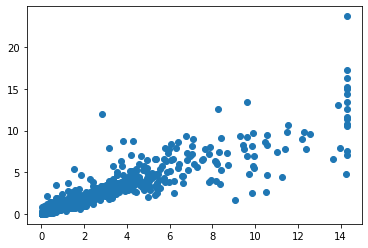

In [106]:
plt.scatter(test_actual,np.exp(xgb_pred))
plt.show()

<AxesSubplot:xlabel='In_creddebt', ylabel='Density'>

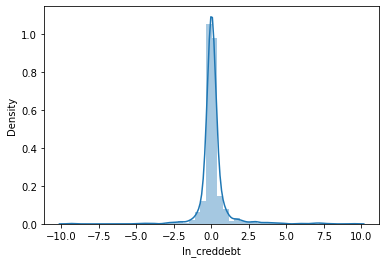

In [107]:
sns.distplot((test_actual-np.exp(xgb_pred)),bins=50)

## Ramdom forest is the winner here!!